In [2]:
import re

with open('t5-large-factual-logs.out','r') as f:
    lines = f.readlines()

exact_match_acc = []
losses = []
duration = []

for line in lines:
    line = line.strip()

    #e=21, exact_match_acc={'exact_match': 0.6044608622463293}
    match = re.search( r"^e=(.*), exact_match_acc={'exact_match': (([0-9]*[.])?[0-9]+)}$", line)
    if match:
        exact_match_acc.append((int(match.group(1)), float(match.group(2))))
        continue

    #loss=203.18201225297526
    match = re.search( r"loss=(([0-9]*[.])?[0-9]+)$", line)
    if match:
        losses.append(float(match.group(1)))
        continue

    #17 took  1:14:20.068869
    match = re.search( r"^(.*) took  (.*):(.*):(([0-9]*[.])?[0-9]+)", line)
    if match:
        duration.append((int(match.group(1)), int(int(match.group(2)) * 60 + int(match.group(3)))))
        continue


In [3]:
build_one = []
build_two = []

for i, ema in enumerate(exact_match_acc):
    epoch = ema[0]
    if epoch == len(build_one)+1 and epoch == duration[i][0]:
        build_one.append((ema[0], ema[1], losses[i], duration[i][1]))
    else:
        build_two.append((ema[0], ema[1], losses[i], duration[i][1]))

In [21]:
import numpy as np

build_one = np.asarray(build_one)
x = build_one[:,0]
y_em = build_one[:,1]
y_loss = build_one[:,2]

y_duration = build_one[:,3]
print(sum(y_duration)/60)

32.35


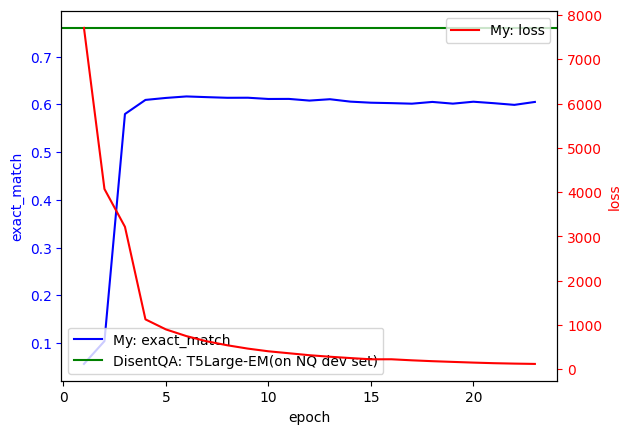

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# create some data

# create a plot with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the data on the first axis
ax1.plot(x, y_em, 'b-', label='My: exact_match')
ax1.set_xlabel('epoch')
ax1.axhline(y=0.76, color='green', label='DisentQA: T5Large-EM(on NQ dev set)')
ax1.set_ylabel('exact_match', color='b')
ax1.tick_params('y', colors='b')

# plot the data on the second axis
ax2.plot(x, y_loss, 'r-', label='My: loss')
ax2.set_ylabel('loss', color='r')
ax2.tick_params('y', colors='r')

# add a legend
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

# show the plot
plt.show()